# Análise por localização

In [1]:
# Importando ferramentas

import pandas            as pd
import numpy             as np
import seaborn           as sns
import matplotlib.pyplot as plt

from zipfile             import ZipFile
from ipywidgets          import interact

pd.set_option('display.float_format', '{:,.2f}'.format)

In [11]:
# Lendo os dados
zf = ZipFile('data\DTB_2020_v2.zip')

# Desembolsos mensais por financiamento do BNDES
desembolso = pd.read_csv('./data/desembolsos-mensais.zip', encoding="UTF-8", sep=";", decimal=",")

# PAM - Produção Agrícola Municipal
pam = pd.read_csv('./data/PAM.zip', encoding="UTF-8", sep=";", decimal=",")

# Pega os Top 10 municípios mais inovativos
top_20 = pd.read_csv('./data/top_20_mun_inovativos.csv', index_col = 0)

In [4]:
desembolso.head()

,ano,mes,forma_de_apoio,produto,instrumento_financeiro,inovacao,porte_de_empresa,regiao,uf,municipio,municipio_codigo,setor_cnae,subsetor_cnae_agrupado,setor_bndes,subsetor_bndes,desembolsos_reais
0,2010,9,DIRETA,BNDES MERCADO DE CAPITAIS,MERCADO DE CAPITAIS,NÃO,GRANDE,SUDESTE,RIO DE JANEIRO,RIO DE JANEIRO,3304557,INDÚSTRIA DE TRANSFORMAÇÃO,"COQUE, PETRÓLEO E COMBUSTÍVEL",INDUSTRIA,QUÍMICA E PETROQUÍMICA,"24,753,538,073.60"
1,2009,7,DIRETA,BNDES FINEM,PROGRAMA PETROBRAS,NÃO,GRANDE,NORDESTE,PERNAMBUCO,IPOJUCA,2607208,INDÚSTRIA DE TRANSFORMAÇÃO,"COQUE, PETRÓLEO E COMBUSTÍVEL",INDUSTRIA,QUÍMICA E PETROQUÍMICA,"9,889,997,969.99"
2,2009,7,DIRETA,BNDES FINEM,PROGRAMA PETROBRAS,NÃO,GRANDE,SUDESTE,RIO DE JANEIRO,DIVERSOS,9999998,INDÚSTRIA DE TRANSFORMAÇÃO,"COQUE, PETRÓLEO E COMBUSTÍVEL",INDUSTRIA,QUÍMICA E PETROQUÍMICA,"9,409,998,497.06"
3,2012,12,DIRETA,BNDES FINEM,PROINVESTE,NÃO,GRANDE,CENTRO OESTE,DISTRITO FEDERAL,DIVERSOS,9999998,COMÉRCIO E SERVIÇOS,ADMINISTRAÇÃO PÚBLICA,COMÉRCIO E SERVIÇOS,COMÉRCIO E SERVIÇOS,"7,271,078,745.30"
4,2009,7,DIRETA,BNDES FINEM,PROGRAMA PETROBRAS,NÃO,GRANDE,SUDESTE,RIO DE JANEIRO,DIVERSOS,9999998,COMÉRCIO E SERVIÇOS,TRANSPORTE TERRESTRE,INFRAESTRUTURA,OUTROS TRANSPORTES,"5,699,997,243.57"


In [7]:
# Pegando só os valores com reais
pam = pam.loc[(pam['ano'].astype(int) >= 1997) & (pam.ano.astype(int) <= 2019)]

# Tirando colunas de cruzeiros (não serão necessárias)
pam.drop(columns = ['valor_cruzeiros', 'valor_cruzeiros_reais'], axis = 1, inplace = True)

# Visualizando as mudanças
pam.head()

,municipio_codigo,ano,area_plantada,area_colhida,valor_reais,razao_colheita_plantio
7,1100015,1997,"24,662.00","24,662.00","10,696.00",1.0
8,1100015,1998,"24,648.00","24,648.00","12,226.00",1.0
9,1100015,1999,"28,262.00","28,262.00","18,058.00",1.0
10,1100015,2000,"29,841.00","29,841.00","19,368.00",1.0
11,1100015,2001,"25,463.00","25,463.00","10,140.00",1.0


In [9]:
desembolso.head()

,municipio,municipio_codigo,desembolso_count,desembolso_sum,regiao
0,ABADIA DE GOIAS,5200050,44,"7,860,183.40",CENTRO OESTE
1,ABADIA DOS DOURADOS,3100104,181,"23,586,381.94",SUDESTE
2,ABADIANIA,5200100,86,"18,866,152.31",CENTRO OESTE
3,ABAETE,3100203,450,"53,429,344.81",SUDESTE
4,ABAETETUBA,1500107,10,"591,035.51",NORTE


In [12]:
# Torna os dados de desembolso compatíveis com os dados externos
desembolso = desembolso[((desembolso['setor_bndes'] == 'AGROPECUÁRIA') & (desembolso.ano.astype(int) <= 2019) & (desembolso.ano.astype(int) >= 1997))]

# Agrupando os desembolsos por município
desembolso = desembolso[["municipio", "municipio_codigo", "desembolsos_reais", 'regiao']]\
                .groupby(["municipio"])\
                .agg(municipio_codigo=("municipio_codigo", "first"), 
                     desembolso_count=("desembolsos_reais", "count"), 
                     desembolso_sum=("desembolsos_reais", "sum"), 
                     regiao = ('regiao', 'first'))\
                .reset_index()

# Junta esses dados com o Desembolsos
df = desembolso.merge(pam,left_on='municipio_codigo',right_on='municipio_codigo',how='inner')

df.head()

,municipio,municipio_codigo,desembolso_count,desembolso_sum,regiao,ano,area_plantada,area_colhida,valor_reais,valor_cruzeiros,valor_cruzeiros_reais,razao_colheita_plantio
0,ABADIA DE GOIAS,5200050,44,"7,860,183.40",CENTRO OESTE,1990,NaN,NaN,NaN,NaN,NaN,NaN
1,ABADIA DE GOIAS,5200050,44,"7,860,183.40",CENTRO OESTE,1991,NaN,NaN,NaN,NaN,NaN,NaN
2,ABADIA DE GOIAS,5200050,44,"7,860,183.40",CENTRO OESTE,1992,NaN,NaN,NaN,NaN,NaN,NaN
3,ABADIA DE GOIAS,5200050,44,"7,860,183.40",CENTRO OESTE,1993,NaN,NaN,NaN,NaN,NaN,NaN
4,ABADIA DE GOIAS,5200050,44,"7,860,183.40",CENTRO OESTE,1994,NaN,NaN,NaN,NaN,NaN,NaN


## Por Região

<br>

### Investimento (Ano) x Valor reais (ano)

<br>

### Investimento (Ano) x Razão Plantação/Colheita

In [16]:
# Criação de um dataframe por divisão de região

df.razao_colheita_plantio = df.razao_colheita_plantio.astype(float)

df_regiao =  df[['regiao',"area_plantada", "area_colhida", 'valor_reais', 'razao_colheita_plantio', 'desembolso_sum', 'desembolso_count']]\
                .groupby(["regiao"])\
                .agg(regiao_br =  ("regiao", "first"), 
                     area_plantada_sum = ("area_plantada", "sum"), 
                     desembolso_count=("desembolso_count", "sum"), 
                     desembolso_sum=("desembolso_sum", "sum"), 
                     area_colhida = ('area_colhida', 'sum'), 
                     valor_reais = ('valor_reais', 'sum'))\
                .reset_index()

df_municipio = df[['municipio','regiao',"area_plantada", 
                    "area_colhida", 'valor_reais', 'razao_colheita_plantio', 
                    'desembolso_sum', 'desembolso_count', 'municipio_codigo']]\
                .groupby(["municipio"])\
                .agg(razao = ('razao_colheita_plantio', np.mean), 
                     regiao_br = ("regiao", "first"), 
                     area_plantada_sum = ("area_plantada", "sum"), 
                     desembolso_count=("desembolso_count", "sum"), 
                     desembolso_sum=("desembolso_sum", "sum"), 
                     area_colhida = ('area_colhida', 'sum'), 
                     valor_reais = ('valor_reais', 'sum'),
                     municipio_cod = ('municipio_codigo', 'first'))\
                .reset_index()

df_municipio['inovativo'] = ['Sim'  if x in list(top_20.municipio_codigo) else 'Não' for x in df_municipio.municipio_cod]

df_regiao.head()

,regiao,regiao_br,area_plantada_sum,desembolso_count,desembolso_sum,area_colhida,valor_reais
0,CENTRO OESTE,CENTRO OESTE,"455,502,409.00",2580570,"1,285,201,209,099.58","451,888,141.00","906,164,067.00"
1,NORDESTE,NORDESTE,"329,690,750.00",1196550,"354,914,850,764.41","310,930,022.00","472,299,674.00"
2,NORTE,NORTE,"77,854,097.00",715350,"201,609,770,421.90","76,197,748.00","176,268,480.00"
3,SUDESTE,SUDESTE,"370,725,388.00",5368500,"1,263,003,511,057.19","368,436,755.00","1,118,419,921.00"
4,SUL,SUL,"548,417,029.00",9711150,"2,224,315,001,274.65","540,868,751.00","1,045,329,951.00"


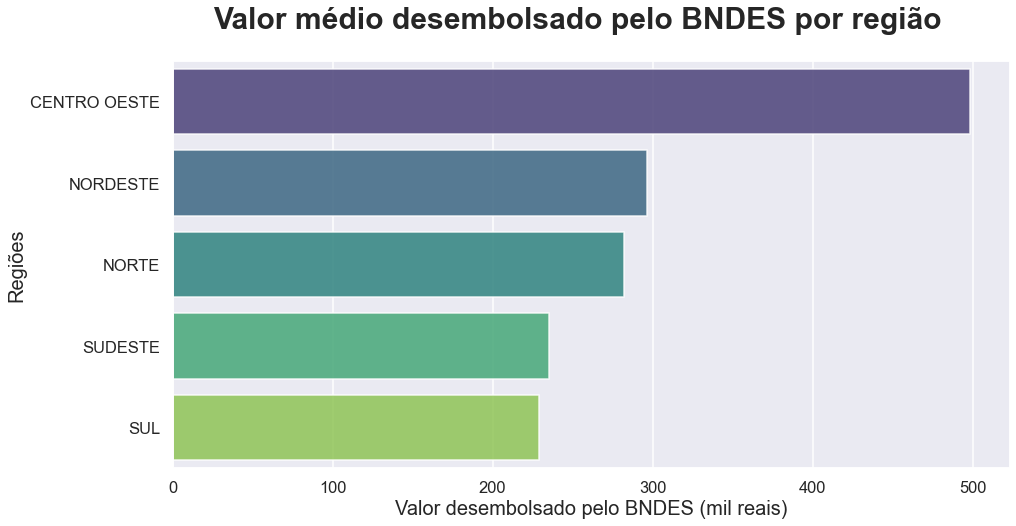

In [17]:
sns.set_theme(style="darkgrid")

sns.set_context("talk")

fig, ax = plt.subplots(figsize = (15,7.5))

ax = sns.barplot(data = df_regiao, 
                x = df_regiao.desembolso_sum / (df_regiao.desembolso_count * 10 ** 3),
                y = df_regiao.regiao_br.str.strip(),
                palette = "viridis",
                alpha = .85, 
                linewidth = 1.5,
                orient = 'h')

ax.set_xlabel('Valor desembolsado pelo BNDES (mil reais)', 
                  fontsize = 20, 
                  y = -0.3)
    
ax.set_ylabel('Regiões', 
                fontsize = 20, 
                y = 0.5)

fig.suptitle('Valor médio desembolsado pelo BNDES por região', 
                fontsize = 30, 
                fontweight = 'bold',
                y = 0.98);

plt.savefig('./plots/desembolso_medio_regiao.png', bbox_inches = 'tight', pad_inches = 0.1)


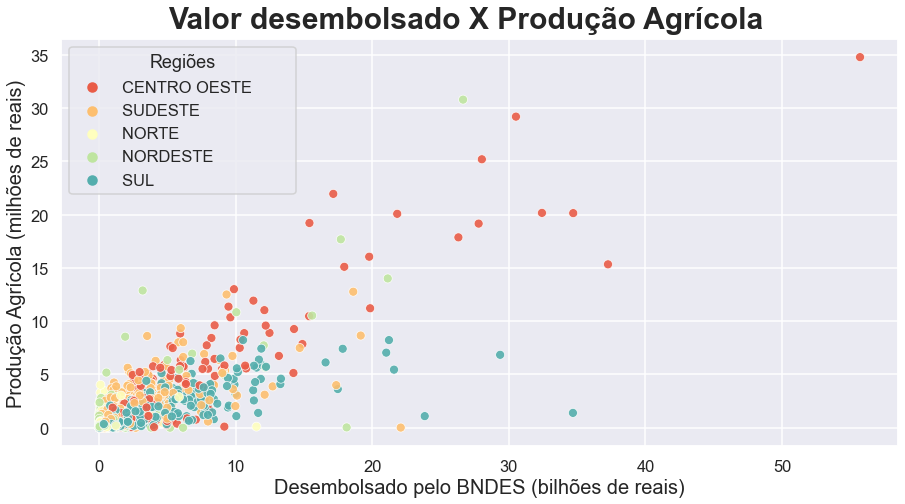

In [18]:
sns.set_theme(style="darkgrid")

sns.set_context("talk")

fig, ax = plt.subplots(figsize = (15,7.5))

ax = sns.scatterplot(x = df_municipio.desembolso_sum / (10 ** 9), 
                     y = df_municipio.valor_reais / (10 ** 6), 
                     hue=df_municipio.regiao_br, 
                     alpha=.9, 
                     palette= 'Spectral')

ax.set_xlabel('Desembolsado pelo BNDES (bilhões de reais)', 
                  fontsize = 20, 
                  y = 0.5,)
    
ax.set_ylabel('Produção Agrícola (milhões de reais)', 
                fontsize = 20, 
                y = 0.5)

fig.suptitle('Valor desembolsado X Produção Agrícola', 
                fontsize = 30, 
                fontweight = 'bold',
                y = 0.94)

ax.legend(loc = 2, fancybox = True, title = 'Regiões')

plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

plt.savefig('./plots/desembolso_vs_prod_agricola.png', bbox_inches = 'tight', pad_inches = 0.1)

In [21]:
def corr_regiao(regiao):
  
    sns.set_theme(style="darkgrid")

    sns.set_context("talk")

    fig, ax = plt.subplots(figsize = (12,6))

    ax = sns.scatterplot(x = df_municipio.loc[(df_municipio.regiao_br == regiao) & (df_municipio.inovativo == 'Não')].desembolso_sum / (10 ** 9), 
                         y = df_municipio.loc[(df_municipio.regiao_br == regiao) & (df_municipio.inovativo == 'Não')].valor_reais / (10 ** 6),
                         alpha=.85, 
                         hue = df_municipio.loc[df_municipio.regiao_br == regiao].inovativo,
                         palette = {"Não": "#4287f5",  'Sim': "#FF5733"},
                         color = "#4287f5")


    ax_inov = sns.scatterplot(x = df_municipio.loc[(df_municipio.regiao_br == regiao) & (df_municipio.inovativo == 'Sim')].desembolso_sum / (10 ** 9), 
                         y = df_municipio.loc[(df_municipio.regiao_br == regiao) & (df_municipio.inovativo == 'Sim')].valor_reais / (10 ** 6),
                         alpha=.9, 
                         color = "#FF5733")

    ax.legend(loc = 4, fancybox = True, title = 'TOP 20 Inovativos')

    ax.set_xlabel('Desembolsado pelo BNDES (bilhões de reais)', 
                    fontsize = 15, 
                    y = 0.5,)
    
    ax.set_ylabel('Produção Agrícola (milhões de reais)', 
                    fontsize = 15, 
                    y = 0.5,
                    x = -0.2)

    fig.suptitle(f'Valor desembolsado X Produção Agrícola no {str(regiao).title()}', 
                    fontsize = 20, 
                    fontweight = 'bold',
                    y = 0.94,
                    x = .55)

    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')

    ax.plot(zorder = 1)
    ax_inov.plot(zorder = 2)

    plt.savefig(f'./plots/desembolso_prod_agricola_{str(regiao).strip()}.png', bbox_inches = 'tight', pad_inches = 0.1)

interact(corr_regiao, regiao = df_municipio.regiao_br.unique());


interactive(children=(Dropdown(description='regiao', options=('CENTRO OESTE        ', 'SUDESTE             ', …

<function __main__.corr_regiao(regiao)>

In [22]:
def corr_razao(regiao):
  
    sns.set_theme(style="darkgrid")

    sns.set_context("talk")

    fig, ax = plt.subplots(figsize = (12,6))

    ax = sns.scatterplot(data = df_municipio.loc[(df_municipio.regiao_br == regiao) & (df_municipio.inovativo == 'Não')], 
                         x = df_municipio.loc[(df_municipio.regiao_br == regiao) & (df_municipio.inovativo == 'Não')].desembolso_sum / (10 ** 9), 
                         y = 'razao',
                         hue = df_municipio.loc[df_municipio.regiao_br == regiao].inovativo,
                         palette = {'Sim': "#FF5733", "Não": "#4287f5"},
                         alpha=.85,
                         color = "#4287f5")

    ax_inov = sns.scatterplot(data = df_municipio.loc[(df_municipio.regiao_br == regiao) & (df_municipio.inovativo == 'Sim')],
                         x = df_municipio.loc[(df_municipio.regiao_br == regiao) & (df_municipio.inovativo == 'Sim')].desembolso_sum / (10 ** 9), 
                         y = 'razao',
                         alpha=.9, 
                         color = "#FF5733")

    ax.legend(loc = 4, fancybox = True, title = 'TOP 20 Inovativos')

    ax.set_xlabel('Desembolsado pelo BNDES (milhões de reais)', 
                    fontsize = 15, 
                    y = 0.5,)
    
    ax.set_ylabel('Razão Colheita\Plantio', 
                    fontsize = 15, 
                    y = 0.5,
                    x = 0.1)

    fig.suptitle(f'Valor desembolsado X Razão Colheita\Plantio no {str(regiao).title()}', 
                    fontsize = 20, 
                    fontweight = 'bold',
                    y = 0.94,
                    x = .55)

    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')

    ax.plot(zorder = 1)
    ax_inov.plot(zorder = 2)

    plt.savefig(f'./plots/desembolso_razao_{str(regiao).strip()}.png', bbox_inches = 'tight', pad_inches = 0.1)

interact(corr_razao, regiao = df_municipio.regiao_br.unique());

interactive(children=(Dropdown(description='regiao', options=('CENTRO OESTE        ', 'SUDESTE             ', …